Basierd auf den folgenden Quellen [1]

[1][https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

* np.linspace(x,y,z): Erstellt einen Vektor mit einer Länge von z. Der Wert x wird um das Inkrement von $\frac{1}{z-1}$ bis der Wert y erreicht wird.
* np.sin(x): Sinusfunktion, in Bogenmaß
* np.random.rand(z): Erstellt einen normalverteilten Zufallsvektor mit einer Länge von 50
* plt.errorbar(x,y, yerr=dy, fmt='.k'): x: X-Werte, y: Y-Werte, yerr=Skalierung der Länge der Fehlerbalken, fmt: Format der Punkte (hier als Punkt)

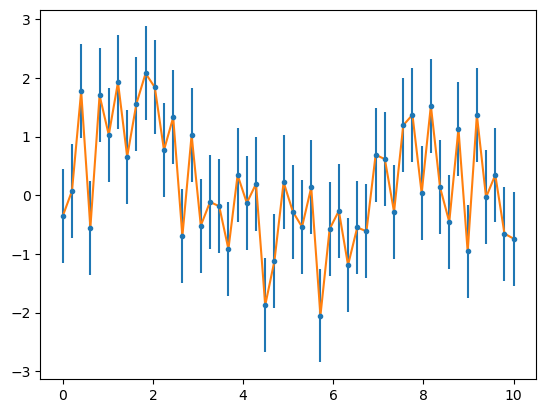

In [150]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.')


In [164]:
def user_defined_funktion(point_density = 1000):
    x = np.linspace(0, 10, point_density)

    y = np.sin(x) + np.random.randn(point_density)
    noise = 0.2
    y = np.sin(x) + noise * np.random.randn(point_density)

    return x, y, noised_y

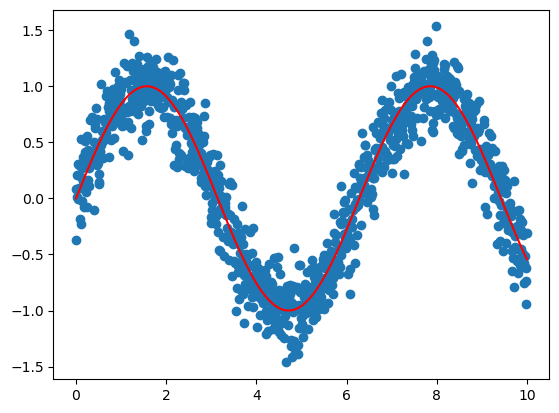

In [165]:
x, y, noised_y = user_defined_funktion(1000)
plt.plot(x,y, c='r')
plt.scatter(x,noised_y)

Einstellen eines lineares Modells aus aus der sklearn-Bibliotek
fit_intercept=True: Modell fittet eine Y-Achsen-Abschnitt

Modell benötigt eine 50x1-Matrix, x ist jedoch eine 50-Vektor -> Anlegen einer neuen Dimension durch x[:, np.newaxis]

In [24]:
print(x.shape)
print(x[:, np.newaxis].shape)

(50,)
(50, 1)


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

LinearRegression()

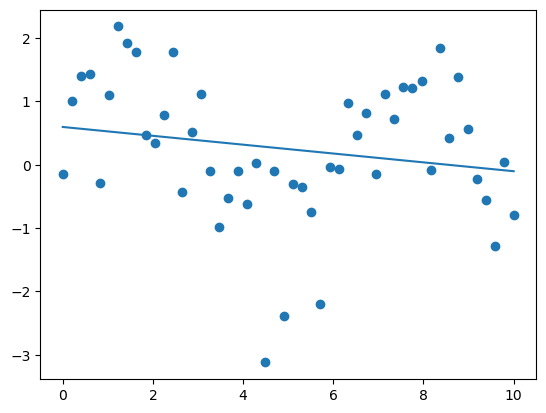

In [32]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

Ridge Regression ($L_2$-Regularization)

In [63]:
import pandas as pd
df = pd.read_csv(r"\\129.217.152.140\Team\Helwing\Lehre\MaschineLerning_CT\Luo_Q_2023.1_Vereinfacht.csv", sep=';', decimal='.')
df[:5]

,Power,Speed,Avizo_Porosity_Mean,Avizo_Porosity_Std,Archimedes_porosity_Mean,Archimedes_porosity_Std,Pore_quantity_Sum,Diameter_Avizo_Mean,Diameter_Avizo_Std,Projected_Pore_area_Avg,...,Strength_Mean,Strength_Std,Yield_mean,Yield_Std,Uniform_Mean,Uniform_Std,Ductility_Mean,Ductility_Std,Youngs_Modulus_Mean,Youngs_Modulus_Std
0,275,800,0.8774,0.0452,1.3189,0.8816,44006.0,50.0,15.0,3798.0,...,1021,6,942,10,6.15,0.08,10.70,0.76,112,5.35
1,275,760,1.9382,0.1495,1.8791,0.8775,57383.0,52.0,16.0,3885.0,...,1008,7,931,12,5.81,0.21,9.19,1.06,108,4.31
2,275,720,2.3027,0.5489,2.1131,0.8748,57874.0,52.0,17.0,4046.0,...,992,16,904,35,6.13,0.64,8.98,0.69,109,11.88
3,275,680,1.6876,0.1638,2.3318,0.8728,67526.0,52.0,18.0,4413.0,...,1009,20,929,21,5.52,0.17,8.50,1.33,108,4.15
4,275,640,2.0607,0.0928,2.5762,0.8700,93003.0,50.0,17.0,4040.0,...,995,27,914,35,5.37,0.38,7.23,1.22,113,11.39


Index(['Power', 'Speed', 'Avizo_Porosity_Mean', 'Avizo_Porosity_Std',
       'Archimedes_porosity_Mean', 'Archimedes_porosity_Std',
       'Pore_quantity_Sum', 'Diameter_Avizo_Mean', 'Diameter_Avizo_Std',
       'Projected_Pore_area_Avg', 'Projected_Pore_area_Max',
       'Projected_Pore_area_Sum', 'Sphericity_Avizo_Mean',
       'Sphericity_Avizo_Std', 'Roughness_Avg_Mean', 'Roughness_Avg_Std',
       'Roughness_RMS_Mean', 'Roughness_RMS_Std', 'Grain_diameter_Mean',
       'Grain_diameter_Std', 'Grain_aspect_Mean', 'Grain_aspect_Std',
       'Vicker_Mean', 'Vicker_Std', 'Strength_Mean', 'Strength_Std',
       'Yield_mean', 'Yield_Std', 'Uniform_Mean', 'Uniform_Std',
       'Ductility_Mean', 'Ductility_Std', 'Youngs_Modulus_Mean',
       'Youngs_Modulus_Std'],
      dtype='object')


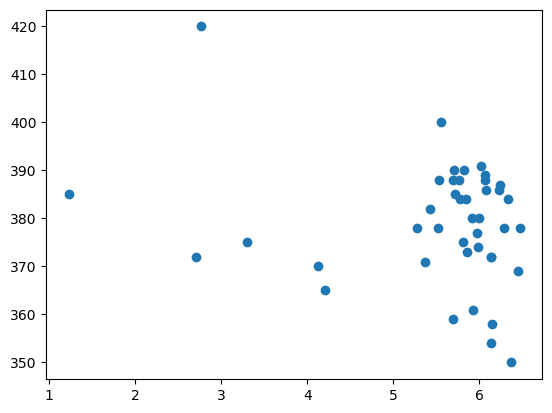

In [121]:
print(df.keys())
plt.scatter(df['Uniform_Mean'], df['Vicker_Mean'])

In [147]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

mechanical_parameter = ['Strength_Mean', 'Strength_Std', 'Yield_mean', 'Yield_Std', 'Uniform_Mean', 'Uniform_Std',
                        'Ductility_Mean', 'Ductility_Std', 'Youngs_Modulus_Mean', 'Youngs_Modulus_Std']

std_parameter = ['Archimedes_porosity_Std','Diameter_Avizo_Std', 'Sphericity_Avizo_Std', 
                 'Roughness_Avg_Std', 'Roughness_RMS_Std', 'Grain_diameter_Std', 'Grain_aspect_Std', 'Vicker_Std']

pore_parameter = ['Avizo_Porosity_Mean', 'Archimedes_porosity_Mean', 'Archimedes_porosity_Std',
                  'Pore_quantity_Sum', 'Diameter_Avizo_Mean', 'Diameter_Avizo_Std', 'Projected_Pore_area_Avg', 
                  'Projected_Pore_area_Max', 'Projected_Pore_area_Sum', 'Sphericity_Avizo_Mean', 'Sphericity_Avizo_Std', 
                  'Roughness_Avg_Mean', 'Roughness_Avg_Std', 'Roughness_RMS_Mean', 'Roughness_RMS_Std']

# separate train and test sets
x = data.drop(labels=(mechanical_parameter+pore_parameter), axis=1)
y = data['Strength_Mean']

x[:5]

,Power,Speed,Grain_diameter_Mean,Grain_diameter_Std,Grain_aspect_Mean,Grain_aspect_Std,Vicker_Mean,Vicker_Std
0,275,800,204,114.06,1.92,0.66,358,26
1,275,760,205,105.15,1.98,0.74,375,14
2,275,720,188,88.09,1.88,0.60,354,10
3,275,680,167,63.48,1.89,0.58,378,19


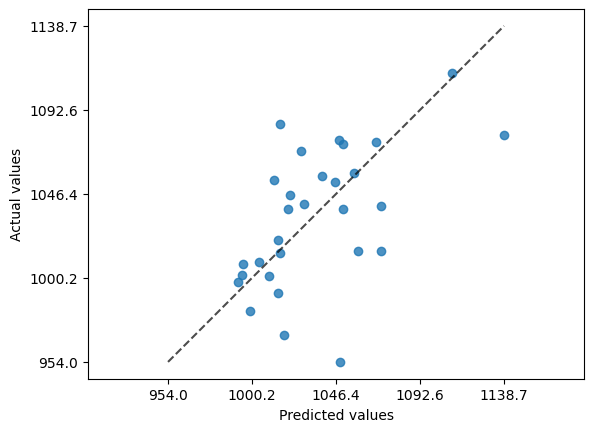

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)


X_train = X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)

scaler.fit(X_train)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = cross_val_predict(model, X_train, y_train, cv=5)



from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    random_state=0,
)

In [129]:
y_pred.shape, y.shape

((29,), (50,))

In [90]:
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
data = df[numerical_vars]
data.shape

mechanical_parameter = ['Strength_Mean', 'Strength_Std', 'Yield_mean', 'Yield_Std', 'Uniform_Mean', 'Uniform_Std',
                        'Ductility_Mean', 'Ductility_Std', 'Youngs_Modulus_Mean', 'Youngs_Modulus_Std']
std_parameter = ['Avizo_Porosity_Std', 'Archimedes_porosity_Std','Diameter_Avizo_Std', 'Sphericity_Avizo_Std', 
                 'Roughness_Avg_Std', 'Roughness_RMS_Std', 'Grain_diameter_Std', 'Grain_aspect_Std', 'Vicker_Std']

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=(mechanical_parameter), axis=1),
    data['Youngs_Modulus_Mean'],
    test_size=0.3,
    random_state=0)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

,Power,Speed,Grain_diameter_Mean,Grain_aspect_Mean,Vicker_Mean
2,275,720,188,1.88,354
41,315,1600,234,2.00,400
18,335,800,179,1.96,385
15,255,800,197,1.96,372
22,205,600,177,1.93,359
16,295,800,229,1.93,390
38,115,600,231,1.97,372
8,275,920,185,1.88,380
13,215,800,189,1.96,378
5,275,600,173,1.91,378
